# Upscale Images with Pre-trained `super-image` Models

---

[Github](https://github.com/eugenesiow/super-image) | All Models @ [huggingface.co](https://huggingface.co/models?filter=super-image)

---

Notebook to use the `super-image` library to quickly upscale and image.

The technique used is applying a pre-trained deep-learning model to restore a high resolution (HR) image from a single low resolution (LR) image. This is also called image super resolution.

The notebook is structured as follows:
* Setting up the Environment
* Using the Model (Running Inference)

## Setting up the Environment

#### Install the library

We will install the `super-image` library using `pip install`.

In [ ]:
!pip install -qq super-image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.0/91.0 kB 1.1 MB/s eta 0:00:00


## Using the Model (Running Inference)

Next we run a few lines of code to:

* `Image.open` and `requests.get` - Download an image from a URL (website) and store this as the `image` variable.
* `EdsrModel.from_pretrained` - Download and load a small, pre-trained deep-learning model to the `model` variable.
* `ImageLoader.load_image` - Load the image into the `model` using the `ImageLoader` helper.
* Use the model to run inference on the image (`inputs`).
* `ImageLoader.save_image` - Save the upscaled image output as a `.png` file using the `ImageLoader` helper.
* `ImageLoader.save_compare` - Save a `.png` that compares our upscaled image from the model with a baseline image using `Bicubic` upscaling.

In [ ]:
from super_image import EdsrModel, ImageLoader
from PIL import Image
import requests

url = 'https://paperswithcode.com/media/datasets/Set5-0000002728-07a9793f_zA3bDjj.jpg'
image = Image.open(requests.get(url, stream=True).raw)

model = EdsrModel.from_pretrained('eugenesiow/edsr-base', scale=2)
inputs = ImageLoader.load_image(image)
preds = model(inputs)

ImageLoader.save_image(preds, './scaled_2x.png')
ImageLoader.save_compare(inputs, preds, './scaled_2x_compare.png')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:655: FutureWarning: 'cached_download' is the legacy way to download files from the HF hub, please consider upgrading to 'hf_hub_download'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/188 [00:00<?, ?B/s]

pytorch_model_2x.pt:   0%|          | 0.00/5.51M [00:00<?, ?B/s]

https://huggingface.co/eugenesiow/edsr-base/resolve/main/pytorch_model_2x.pt


/usr/local/lib/python3.10/dist-packages/super_image/data/loader.py:14: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:261.)
  return torch.as_tensor([lr])


View the comparison image to see, visually, how our model performed (on the right) against the baseline bicubic method (left).

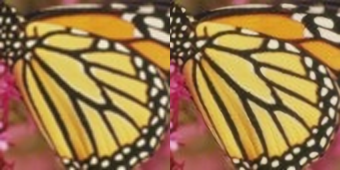

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('./scaled_2x_compare.png')
cv2_imshow(img)

We can view the original image that we pulled from the URL/website using `cv2_imshow`.

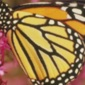

In [ ]:
import numpy as np

cv2_imshow(cv2.cvtColor(np.array(image), cv2.COLOR_BGR2RGB))

In [ ]:
from super_image import EdsrModel, ImageLoader
from PIL import Image
import requests

url = 'https://blogger.googleusercontent.com/img/a/AVvXsEjI8HbXV1rB7_d2YAd3D2OhdN-EOgBFFmohUJ531YtXky4toJSHGAvSj-RqF3RSDm3kyxCy_uuc7DR8BtmzF8TkP1-Fn8uaMY0wYK59A2tPVU5Sv8KHQ5qDyqpPDYez3r1ELOv9uiKpTMODCTTByU2rbaI15goTU3HUM5q4esSTMh4ug3FrgAKHY8O4HpI'
#需要圖片自行上傳至網頁再複製圖片網址
image = Image.open(requests.get(url, stream=True).raw)

model = EdsrModel.from_pretrained('eugenesiow/edsr-base', scale=4)
inputs = ImageLoader.load_image(image)
preds = model(inputs)

ImageLoader.save_image(preds, './BSD_5.png')
ImageLoader.save_compare(inputs, preds, './BSD_5_compare.png')

https://huggingface.co/eugenesiow/edsr-base/resolve/main/pytorch_model_4x.pt


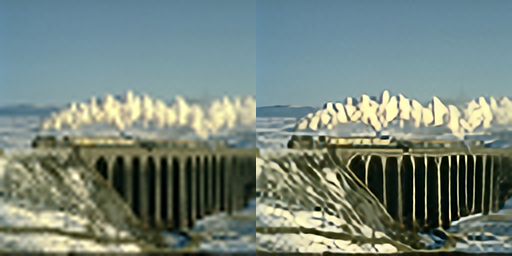

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('./BSD_5_compare.png')
cv2_imshow(img)

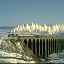

In [ ]:
import numpy as np

cv2_imshow(cv2.cvtColor(np.array(image), cv2.COLOR_BGR2RGB))